In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import pandas as pd
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv('~/datasets/house-price-prediction-challenge/train.csv')
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [58]:
df.drop(['POSTED_BY', 'ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True)
df.head()


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [59]:
X = df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = df['TARGET(PRICE_IN_LACS)']

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
1%          12.200000
5%          19.500000
10%         25.000000
25%         38.000000
50%         62.000000
75%        100.000000
90%        200.000000
95%        300.000000
99%       1045.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

<Axes: ylabel='Density'>

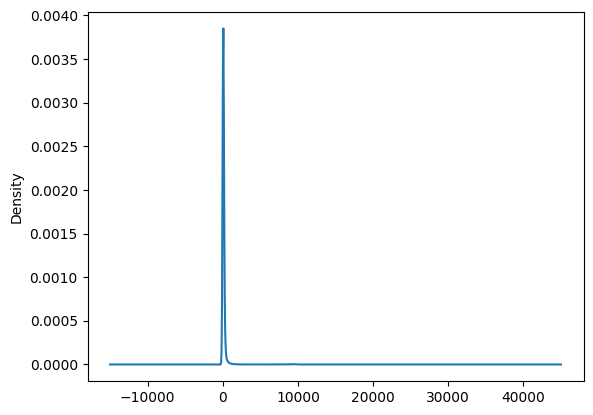

In [60]:
display(y.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
y.plot(kind='kde')

<Axes: ylabel='Density'>

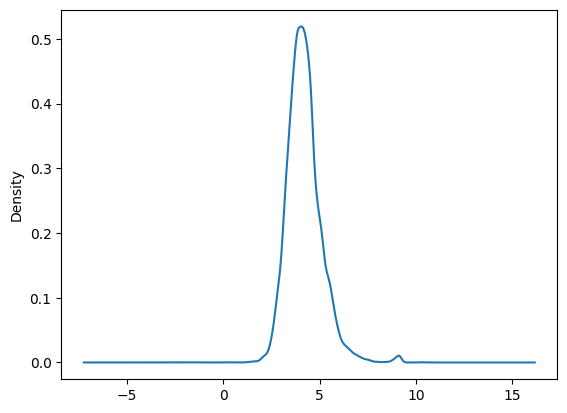

In [61]:
y = np.log(y)
y.plot(kind='kde')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ALERT: If this was a time based prediction scenario, we would have prepared an OOT sample like below:
# train_size = int(0.7 * X.shape[0])
# X_train, X_test = X[:train_size], X[train_size:]']
# y_train, y_test = y[:train_size], y[train_size:]

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [63]:
class Model(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(n_inputs, 20)
        self.tanh1 = nn.Tanh()
        self.linear2 = nn.Linear(20, 10)
        self.tanh2 = nn.Tanh()
        self.output = nn.Linear(10, n_outputs)


    def forward(self, x):
        x = self.linear1(x)
        x = self.tanh1(x)
        x = self.linear2(x)
        x = self.tanh2(x)
        return self.output(x)

In [64]:
model = Model(X_train.shape[1], 1)
criterion = nn.MSELoss()

In [65]:
X_train.shape

(23560, 8)

In [66]:
epochs = 100
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    inputs = torch.from_numpy(X_train.to_numpy()).float()
    targets = torch.from_numpy(y_train.to_numpy()).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (23560x10 and 20x10)